In [1]:
# підключення базових модулей
import matplotlib.pyplot as plt

# вимикаємо зайві попередження
import warnings
warnings.filterwarnings("ignore")

# друк всіх результатів в одній комірці а не тільки останнього
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# магічний метод для того щоб отримувати графіки біля комірок з кодом
%matplotlib inline

In [2]:
# підключення спеціалізованих модулей
import timeit
from functools import lru_cache
import tabulate

In [3]:
# реалізація класу Splay Tree для зберігання даних "key: value"

class Node:
    def __init__(self, key, value, parent=None):
        self.key = key
        self.value = value
        self.parent = parent
        self.left_node = None
        self.right_node = None


class SplayTree:
    def __init__(self):
        self.root = None

    def insert(self, key, value):
        """Вставка нового елемента в дерево."""
        if self.root is None:
            self.root = Node(key, value)
        else:
            self._insert_node(key, value, self.root)

    def _insert_node(self, key, value, current_node):
        """Рекурсивна вставка елемента в дерево."""
        if key < current_node.key:
            if current_node.left_node:
                self._insert_node(key, value, current_node.left_node)
            else:
                current_node.left_node = Node(key, value, current_node)
        else:
            if current_node.right_node:
                self._insert_node(key, value, current_node.right_node)
            else:
                current_node.right_node = Node(key, value, current_node)

    def find(self, key):
        """Пошук елемента в дереві із застосуванням сплаювання."""
        node = self.root
        while node is not None:
            if key < node.key:
                node = node.left_node
            elif key > node.key:
                node = node.right_node
            else:
                self._splay(node)
                return node.value
        return None  # Якщо елемент не знайдено.

    def _splay(self, node):
        """Реалізація сплаювання для переміщення вузла до кореня."""
        while node.parent is not None:
            if node.parent.parent is None:  # Zig-ситуація
                if node == node.parent.left_node:
                    self._rotate_right(node.parent)
                else:
                    self._rotate_left(node.parent)
            elif (
                node == node.parent.left_node
                and node.parent == node.parent.parent.left_node
            ):  # Zig-Zig
                self._rotate_right(node.parent.parent)
                self._rotate_right(node.parent)
            elif (
                node == node.parent.right_node
                and node.parent == node.parent.parent.right_node
            ):  # Zig-Zig
                self._rotate_left(node.parent.parent)
                self._rotate_left(node.parent)
            else:  # Zig-Zag
                if node == node.parent.left_node:
                    self._rotate_right(node.parent)
                    self._rotate_left(node.parent)
                else:
                    self._rotate_left(node.parent)
                    self._rotate_right(node.parent)

    def _rotate_right(self, node):
        """Права ротація вузла."""
        left_child = node.left_node
        if left_child is None:
            return

        node.left_node = left_child.right_node
        if left_child.right_node:
            left_child.right_node.parent = node

        left_child.parent = node.parent
        if node.parent is None:
            self.root = left_child
        elif node == node.parent.left_node:
            node.parent.left_node = left_child
        else:
            node.parent.right_node = left_child

        left_child.right_node = node
        node.parent = left_child

    def _rotate_left(self, node):
        """Ліва ротація вузла."""
        right_child = node.right_node
        if right_child is None:
            return

        node.right_node = right_child.left_node
        if right_child.left_node:
            right_child.left_node.parent = node

        right_child.parent = node.parent
        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left_node:
            node.parent.left_node = right_child
        else:
            node.parent.right_node = right_child

        right_child.left_node = node
        node.parent = right_child


if __name__ == "__main__":
    # тестування модернізованого Splay Tree
    test_splay_tree = SplayTree()
    test_splay_tree.insert(10, "10+")
    test_splay_tree.insert(8, "8+")
    test_splay_tree.insert(3, "3+")
    test_splay_tree.insert(7, "7+")

    print("Accessing 7:", test_splay_tree.find(7))
    print("Accessing 3:", test_splay_tree.find(3))
    print("Accessing 8:", test_splay_tree.find(8))
    print("Accessing 11:", test_splay_tree.find(11))
    print("Root after operations:", test_splay_tree.root.key)

Accessing 7: 7+
Accessing 3: 3+
Accessing 8: 8+
Accessing 11: None
Root after operations: 8


In [4]:
# підготовка рядків коду для замірів часу виконання

lru_code_text = """
MAXSIZE = 1000

# from functools import lru_cache

@lru_cache(maxsize=MAXSIZE)
def fibonacci_lru(n):
    if n < 2:
        return n
    return fibonacci_lru(n - 1) + fibonacci_lru(n - 2)

res = fibonacci_lru(i)
    """

splay_code_text = """
def fibonacci_splay(n, memo=None):
    if memo is None:
        memo = SplayTree()

    from_memo = memo.find(n)

    if from_memo:
        return from_memo

    if n <= 1:
        return n

    value = fibonacci_splay(n - 1, memo) + fibonacci_splay(n - 2, memo)
    memo.insert(n, value)
    return value

res = fibonacci_splay(i)
"""

In [5]:
# замірюємо час виконання функцій

# кількість замірів
n = 100

# замір часу виконання функції fibonacci_lru
lru_avg_timer_dict = {}
for i in range(0, 1000, 50):
    dict_timer = timeit.timeit(
        stmt=lru_code_text,
        setup="from __main__ import i, lru_cache",
        number=n,
    )
    lru_avg_timer_dict[i] = dict_timer / n

# замір часу виконання функції fibonacci_splay
splay_avg_timer_dict = {}
for i in range(0, 1000, 50):  
    dict_timer = timeit.timeit(
        stmt=splay_code_text,
        setup="from __main__ import i, SplayTree",
        number=n,
    )
    splay_avg_timer_dict[i] = dict_timer / n


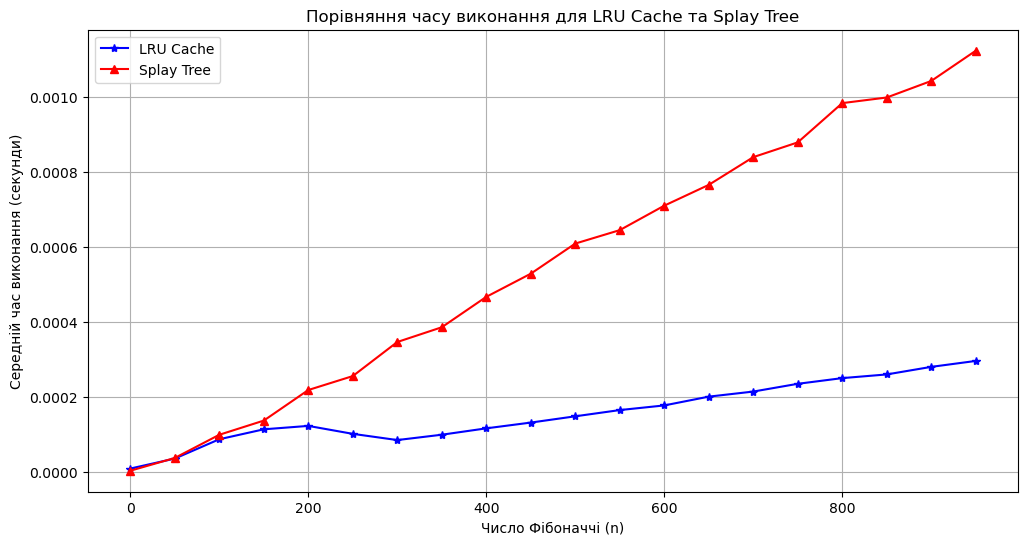

In [6]:
# малюємо графік порівняння часу виконання

# Створюємо дані для осі X
X = list(lru_avg_timer_dict.keys())

# Створюємо дані для осі Y
Y1 = list(lru_avg_timer_dict.values())
Y2 = list(splay_avg_timer_dict.values())

# Створюємо фігуру
plt.figure(figsize=(12, 6))

# Малюємо першу лінію
plt.plot(X, Y1, label="LRU Cache", color="blue", marker='*', linestyle='-',)

# Малюємо другу лінію
plt.plot(X, Y2, label="Splay Tree", color="red", marker='^', linestyle='-',)

# Додаємо заголовок та підписи осей
plt.title("Порівняння часу виконання для LRU Cache та Splay Tree")
plt.xlabel("Число Фібоначчі (n)")
plt.ylabel("Середній час виконання (секунди)")

# Додаємо легенду, щоб позначити лінії
plt.legend()

# Відображаємо сітку
plt.grid(True)

# Показуємо графік
plt.show();

In [7]:
# створюємо таблицю з результатами

# Створюємо заголовки для таблиці
headers = ["n", "LRU Cache Time (s)", "Splay Tree Time (s)"]

# Створюємо таблицю з даними
table_data = []
for i in range(len(X)):
    table_data.append((X[i], f"{Y1[i]:.8f}", f"{Y2[i]:.8f}"))
    
# Виводимо таблицю
print(tabulate.tabulate(table_data, headers=headers, 
                        # tablefmt="grid"
                        ))

  n    LRU Cache Time (s)    Splay Tree Time (s)
---  --------------------  ---------------------
  0            7.95e-06               2.18e-06
 50            3.465e-05              3.623e-05
100            8.624e-05              9.821e-05
150            0.00011279             0.00013608
200            0.00012188             0.00021773
250            0.00010067             0.00025499
300            8.409e-05              0.00034596
350            9.832e-05              0.00038537
400            0.00011537             0.00046659
450            0.00013076             0.00052845
500            0.00014753             0.0006089
550            0.00016417             0.00064479
600            0.00017659             0.00071015
650            0.00020005             0.00076568
700            0.0002136              0.00083974
750            0.00023433             0.00087917
800            0.00024952             0.00098404
850            0.00025937             0.00099903
900            0.00027958

Висновки:
---------

1. Кешування за допомогою LRU Cache виявилося суттєво швидшим, ніж Splay Tree.
2. Причини цього (на мою думку) в тому, що при переміщенні/додаванні елемента, що був використаний останнім, LRU Cache виконує операції тільки з першим та останнім елементом двозв'язного списку (перший - додається, останній - видаляється) - складність O(1), тоді як в Splay Tree - перебудовується все дерево - складність O(log n).